### 1018 복습

In [ ]:
import pandas as pd
import pydataset

mpg = pydataset.data("mpg")

#'r', 'p' 만
a = ['e','d','c']
mpg = mpg[~mpg['fl'].isin(a)]
mpg

#방법1
mpg.query("fl == 'r'| fl == 'p'")

#방법2
cond1 = mpg['fl'] == 'r'
cond2 = mpg['fl'] == 'p'
mpg[cond1 | cond2]

#'cty' 칼럼 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(mpg['cty'].values.reshape(-1,1))
## scaler.fit_stransform(mpg[['cty']].values) 이 코드도 동일함 

## 5. 회귀
회귀 : 수치형<br>
단순회귀 / 다중회귀 / 로지스틱회귀 / 다항회귀 / 라쏘, 릿지 회귀

### (1) 단순 선형 회귀를 통한 회귀 이해

### (2) 비용 최소화 하기 - 경사 하강법(Gradient Descent)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
np.random.seed(0)
X = 2*np.random.rand(100, 1)   #rand() : 0과 1사이의 값을 균등분포
y = 6 + 4*X + np.random.randn(100, 1)    #임의의 값은 노이즈를 위해 만듦

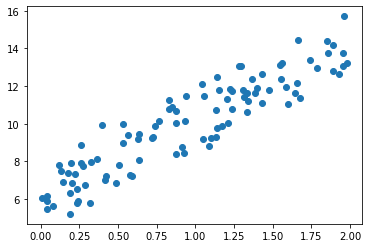

In [6]:
plt.scatter(X, y)

### (3) 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression(fit_intercept = True)

In [ ]:
#X, y는 2차원 array
np.random.seed(0)
X = 2*np.random.rand(100, 1) 
y = 6 + 4*X + np.random.randn(100, 1)

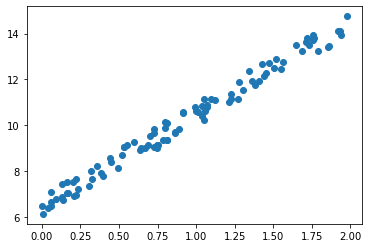

In [11]:
#1차원 array
x = 2*np.random.rand(100).
y = 6 + 4*x + np.random.rand(100)

plt.scatter(x, y)

In [19]:
#lr = model.fit(x, y)    error
lr = model.fit(x.reshape(-1, 1), y)

In [21]:
x.reshape(-1, 1)
x.reshape(-1, 1).shape

(100, 1)

In [23]:
x[:, np.newaxis]
x[:, np.newaxis].shape

(100, 1)

In [24]:
x[np.newaxis, :]
x[np.newaxis, :].shape

(1, 100)

In [ ]:
#coef_ : fit() 메서드를 수행했을 때 회귀 계수가 배열형태로 저장하는 속성
lr.coef_
lr.intercept_

#### * LinearRegression 을 이용해 보스턴 주택 가격 회귀 구현

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy import stats
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

In [29]:
#boston 데이터 세트 로드
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
             
#boston 데이터 세트의 target 배열(주택가격) -> PRICE 컬럼으로 추가
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [30]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [31]:
#boston_df 데이터 세트 크기
boston_df.shape

(506, 14)

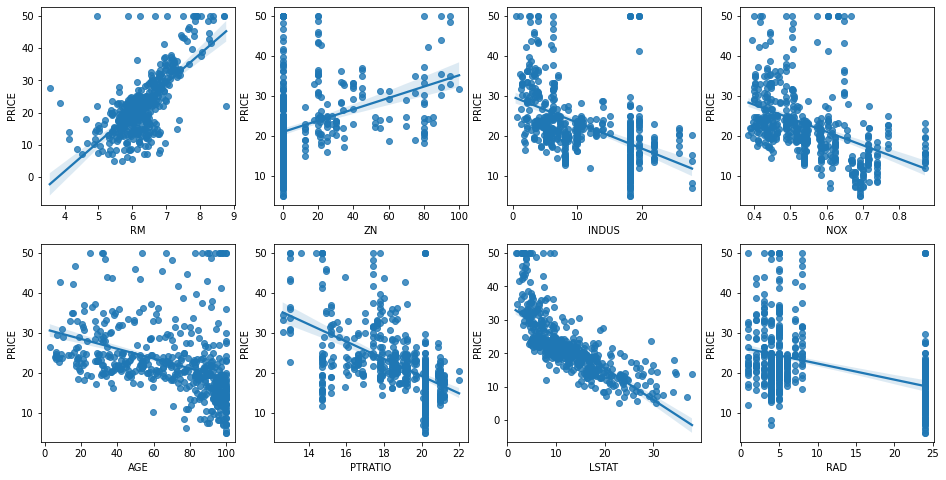

In [33]:
#x, y축의 산점도 + 선형 회귀 직선 시각화 -> seaborn의 regplot() / matplotlib.subplots()
#2개의 행과 4개의 열을 가진 subplots를 이용, axs는 4x2개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    sns.regplot(data = boston_df, x = feature, y = 'PRICE', ax = axs[row][col])
    
#방 개수(RM)가 많을 수록 가격이 증가하는 모습을 볼 수 있다
#LSTAT(하위 계층의 비율)는 음방향의 선형성이 가장 크다
#LSTAT이 적을 수록 PRICE가 증가

In [35]:
#LinearRegression 클래스를 이용한 회귀 모델
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
features = boston_df.iloc[:, :-1]
labels = boston_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size = 0.3, random_state = 156)

#선형 회귀 OLS로 학습/예측/평가
lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)

In [38]:
print(lr.intercept_)
np.round(lr.coef_, 1)    #여러 개의 일차 항의 계수 값

40.99559517216412


array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
        -0. ,  -0.9,   0. ,  -0.6])

In [39]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [42]:
#회귀 계수를 큰 값 순으로 정렬 -> Series 사용
coef_s = pd.Series(data = np.round(lr.coef_, 1), index = features.columns)
coef_s.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [54]:
#교차 검증으로 MSE와 RMSE 추정 - cross_val_score
from sklearn.model_selection import cross_val_score

features = boston_df.iloc[:, :-1]
labels = boston_df.iloc[:, -1]
lr = LinearRegression()

#cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 RMSE를 구함
neg_mse_scores = cross_val_score(lr, features, labels, scoring = 'neg_mean_squared_error', cv = 5)

#neg_mse_scores 는 음수이기 때문에, '-1'을 곱해서 양수 값으로 변환
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [55]:
#cross_val_score(scoring = 'neg_mean_squared_error')로 반환된 값은 모두 음수
print(np.round(neg_mse_scores, 2))
print(np.round(rmse_scores, 2))
print(np.round(avg_rmse, 3))

[-12.46 -26.05 -33.07 -80.76 -33.31]
[3.53 5.1  5.75 8.99 5.77]
5.829


### (4) 다항 회귀와 과대적합/과소적합 이해
w0 + w1x1 + w2x2 + w3x3 + w4x4 + ... + wnxn --> 다중 회귀<br>
w0 + w1x^1 + w2x^2 + w3x^3 + w4x^4 + ... + wnx^n --> 4차식, 다항 회귀<br>
degree : 차수

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline    #pipeline : 순서대로 여러가지를 그려낸다
import numpy as np

In [45]:
#3차 다항식을 만드는 함수
def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 0]**3
    return y

#Pipeline 객체로 Streamline 하게 Polynomial Feature 변환과 Linear Regression을 연결
#Pipeline() : 괄호 안에 입력한 것들이 '순서대로', '물 흐르듯이' 실행된다
model = Pipeline([('poly', PolynomialFeatures(degree = 3)),    #degree = 3 : 3차식
         ('linear', LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

In [46]:
X

array([[0, 1],
       [2, 3]])

In [47]:
y

array([ 1, 49])

In [48]:
model.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])

In [49]:
model.named_steps

{'poly': PolynomialFeatures(degree=3), 'linear': LinearRegression()}

In [50]:
model.named_steps['linear']

LinearRegression()

In [53]:
model.named_steps['linear'].coef_.round(4)

array([0.    , 0.0721, 0.0721, 0.1441, 0.2162, 0.2883, 0.2883, 0.4324,
       0.6486, 0.9369])

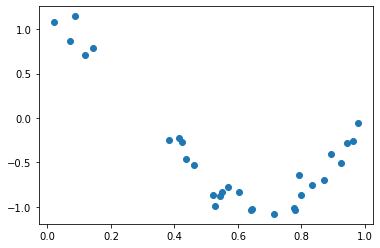

In [56]:
#임의의 값으로 구성된 X에 대해 코사인 변환 값을 반환
def true_func(X):
    return np.cos(1.5 * np.pi*X)

#X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터이다
np.random.seed(0)
X = np.sort(np.random.rand(30))

#y 값은 코사인 기반의 true_func()에서 약간의 노이즈 변동 값을 더한 값이다
#true_func(X)
y = true_func(X) + np.random.randn(30) * 0.1

plt.scatter(X, y)

### (5) 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

#### * 릿지 회귀

In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [59]:
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, features, labels, scoring = 'neg_mean_squared_error', cv=5)
rmse = np.sqrt(-1 * neg_mse_scores)
np.mean(rmse).round(4)

5.5182

In [60]:
ridge = Ridge(alpha = 2)
neg_mse_scores = cross_val_score(ridge, features, labels, scoring = 'neg_mean_squared_error', cv=5)
rmse = np.sqrt(-1 * neg_mse_scores)
np.mean(rmse).round(4)

5.6105

In [61]:
ridge = Ridge(alpha = 200)
neg_mse_scores = cross_val_score(ridge, features, labels, scoring = 'neg_mean_squared_error', cv=5)
rmse = np.sqrt(-1 * neg_mse_scores)
np.mean(rmse).round(4)

5.3405

#### * 라쏘회귀

In [63]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 10)
scores = cross_val_score(lasso, features, labels, scoring = 'neg_mean_squared_error', cv=5)
rmse = np.sqrt(-1 * scores)
np.mean(rmse).round(4)

6.5857

In [1]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
model = LinearRegression(fit_intercept = True)

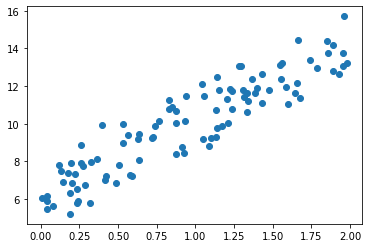

In [5]:
np.random.seed(0)
X = 2*np.random.rand(100, 1)
y = 6 + 4*X + np.random.randn(100, 1)

plt.scatter(X, y)

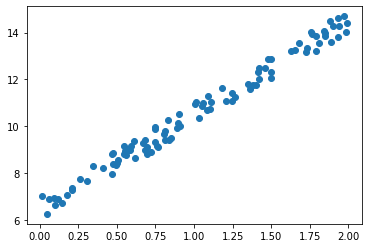

In [7]:
X = 2*np.random.rand(100)
y = 6 + 4*X + np.random.rand(100)

plt.scatter(X, y)

In [9]:
lr = model.fit(X, y)

ValueError: Expected 2D array, got 1D array instead:
array=[1.03461703 0.84817798 1.10937562 0.57410304 1.41314941 0.82971374
 0.72109112 1.65731383 1.84993382 0.09201462 0.46525399 0.69703874
 1.62993296 1.97098286 1.93794341 1.80989669 0.59311253 1.98402249
 0.49884008 0.21181231 1.90190522 0.46684051 1.37953653 0.11671272
 1.4614182  1.76344042 0.54487379 0.75811379 0.74859237 1.49757652
 0.47561449 0.3437062  0.8985833  0.60893681 1.67837824 0.47548365
 1.00477891 1.8851672  1.2679954  1.73457881 1.88041938 1.50152972
 1.39915012 1.93593113 1.98880158 0.90364337 0.14173956 0.58558806
 0.30470941 0.83497275 0.26257866 1.20823561 0.76561612 1.79077177
 1.93558934 1.0937698  0.54964714 1.18446084 1.79352232 0.81346669
 1.10415655 0.54330554 0.9108883  0.80342707 0.49682693 1.01173277
 0.62076165 0.74606973 1.04994088 1.50119005 0.66701493 1.84831753
 1.72463709 0.09738059 0.50728505 0.89227103 0.20925578 0.69695198
 1.48019505 1.36102896 1.24476886 1.42105681 0.40984737 0.68339623
 1.35248496 1.75846953 1.08735611 0.5653993  0.06047052 1.42067366
 0.01576821 0.74535814 1.06107443 1.84422292 0.17898909 0.81188464
 0.0486264  0.68522197 1.24446212 0.5581359 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [10]:
lr = model.fit(X.reshape(-1, 1), y)

In [14]:
X
X.reshape(-1, 1)
X.reshape(-1, 1).shape

(100, 1)

In [16]:
X[:, np.newaxis].shape

(100, 1)

In [17]:
lr.coef_

array([3.99919175])

In [18]:
lr.intercept_

6.517203129034742

In [19]:
import seaborn as sns

In [20]:
from scipy import stats
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

In [22]:
boston = load_boston()
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [24]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [23]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [25]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [26]:
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [28]:
boston_df.shape

(506, 14)

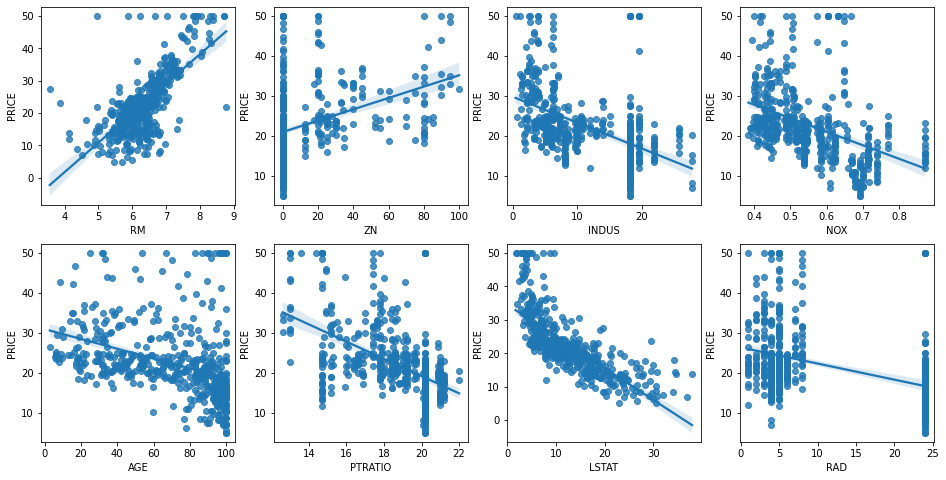

In [29]:
fig, axs = plt.subplots(figsize=(16, 8), ncols = 4, nrows = 2)

lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    sns.regplot(data = boston_df, x = feature, y = 'PRICE', ax = axs[row][col])

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
features = boston_df.iloc[:, :-1]
labels = boston_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state=156)

In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)

print(mse)
print(rmse)

17.296915907902058
4.158956107955704


In [34]:
print(lr.intercept_)
np.round(lr.coef_, 1)

40.99559517216412


array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
        -0. ,  -0.9,   0. ,  -0.6])

In [35]:
coef_s = pd.Series(data = np.round(lr.coef_, 1), index = features.columns)
coef_s.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [36]:
from sklearn.model_selection import cross_val_score

features = boston_df.iloc[:, :-1]
labels = boston_df.iloc[:, -1]
lr = LinearRegression()

In [37]:
neg_mse_scores = cross_val_score(lr, features, labels, scoring = 'neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [38]:
print(np.round(neg_mse_scores, 2))
print(np.round(rmse_scores, 2))
print(np.round(avg_rmse, 3))

[-12.46 -26.05 -33.07 -80.76 -33.31]
[3.53 5.1  5.75 8.99 5.77]
5.829
